# Imports

In [34]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from PIL import Image

from ultralytics import YOLO

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Configuration

In [2]:
device = 0 if torch.cuda.is_available() else 'cpu'
configuration_file = os.path.join(os.path.dirname(os.getcwd()), 'data', 'yalo_configuration.yaml')
models_folder = os.path.join(os.path.dirname(os.getcwd()), 'models', 'yalo')

# Models Training

In [3]:
def train_yolo(model_name, epochs, pretrained, augment_dataset, name, batch=32, configuration_file=configuration_file,device=device):
    model_v11 = YOLO(model_name)  # load the model 
    
    if augment_dataset:
        model_v11.train(
            data=configuration_file,
            epochs=epochs,
            batch=batch,
            device=device, 
            pretrained=pretrained,
            project=models_folder,
            name=name,
            patience=50,
            hsv_h=0.0,
            hsv_s=0.0,
            hsv_v=0.7,
            degrees=15.0,
            translate=0.2,
            scale=0.5,
            shear=10.0,
            perspective=0.0005,
            flipud=0.5,
            fliplr=0.5,
            bgr=0.0,
            mosaic=1.0,
            mixup=0.1,
        )
    else: 
        model_v11.train(
            data=configuration_file,
            epochs=epochs,
            batch=batch,
            device=device, 
            pretrained=pretrained,
            project=models_folder,
            name=name,
            patience=50,
            hsv_h=0.0,  # disable HSV-Hue augmentation
            hsv_s=0.0,  # disable HSV-Saturation augmentation
            hsv_v=0.0,  # disable HSV-Value augmentation
            degrees=0.0,  # disable rotation
            translate=0.0,  # disable translation
            scale=0.0,  # disable scaling
            shear=0.0,  # disable shearing
            perspective=0.0,  # disable perspective
            flipud=0.0,  # disable vertical flipping
            fliplr=0.0,  # disable horizontal flipping
            mosaic=0.0,  # disable mosaic augmentation
            mixup=0.0  # disable mixup augmentation
        )    

#### V11s scratch - No Augmentation

In [4]:
# train_yolo(
#     model_name="yolo11s.pt", 
#     epochs=400, 
#     pretrained=False, 
#     augment_dataset=False, 
#     name="YOLOv11_Small_No_Augmentation_Scratch"
# )

#### V11s scratch - Augmentation

In [5]:
# train_yolo(
#     model_name="yolo11s.pt", 
#     epochs=400, 
#     pretrained=False, 
#     augment_dataset=True, 
#     name="YOLOv11_Small_Augmentation_Scratch"
# )

#### V11s Pretrained - No Augmentation

In [6]:
# train_yolo(
#     model_name="yolo11s.pt", 
#     epochs=400, 
#     pretrained=True, 
#     augment_dataset=False, 
#     name="YOLOv11_Small_NO_Augmentation_PreTrained"
# )

#### V11s Pretrained - Augmentation

In [7]:
# train_yolo(
#     model_name="yolo11s.pt", 
#     epochs=400, 
#     pretrained=True, 
#     augment_dataset=True, 
#     name="YOLOv11_Small_Augmentation_PreTrained"
# )

#### V11 large Scratch - No Augmentation

In [8]:
# train_yolo(
#     model_name="yolo11l.pt", 
#     epochs=400,
#     batch=16, 
#     pretrained=False, 
#     augment_dataset=False, 
#     name="YOLOv11_Large_No_Augmentation_Scratch"
# )

#### V11 large Scratch -  Augmentation

In [9]:
# train_yolo(
#     model_name="yolo11l.pt", 
#     epochs=400, 
#     batch=16,
#     pretrained=False, 
#     augment_dataset=True, 
#     name="YOLOv11_Large_Augmentation_Scratch"
# )

#### V11 large Pretrained - No Augmentation

In [10]:
# train_yolo(
#     model_name="yolo11l.pt", 
#     epochs=400, 
#     batch=16,
#     pretrained=True, 
#     augment_dataset=False, 
#     name="YOLOv11_Large_No_Augmentation_PreTrained"
# )

#### V11 large Pretrained - Augmentation

In [11]:
# train_yolo(
#     model_name="yolo11l.pt", 
#     epochs=400, 
#     batch=16,
#     pretrained=True, 
#     augment_dataset=True, 
#     name="YOLOv11_Large_Augmentation_PreTrained"
# )

# Models Evaluation 

In [16]:
def evaluate(model_name):
    model_path = os.path.join(models_folder, model_name, 'weights', 'best.pt')
    model = YOLO(model_path)

    metrics = model.val(
        project=models_folder,
        name=f'EVAL_{model_name}',
        device=device,
        seed=42,
        split='test'
    )

    # Extract performance metrics
    performance_metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness']
    performance_data = {metric: metrics.results_dict[metric] for metric in performance_metrics}

    # Extract speed metrics
    speed_metrics = ['preprocess', 'inference', 'postprocess']
    speed_data = {metric: metrics.speed[metric] for metric in speed_metrics}

    return performance_data, speed_data

In [17]:
model_names = [
    # Small YOLO model
    'YOLOv11_Small_No_Augmentation_Scratch',
    'YOLOv11_Small_Augmentation_Scratch',
    'YOLOv11_Small_No_Augmentation_PreTrained',
    'YOLOv11_Small_Augmentation_PreTrained',
    # Large YOLO model
    'YOLOv11_Large_No_Augmentation_Scratch',
    'YOLOv11_Large_Augmentation_Scratch',
    'YOLOv11_Large_No_Augmentation_PreTrained',
    'YOLOv11_Large_No_Augmentation_PreTrained',
]

results_list = []

for model_name in model_names:
    performance_data, speed_data = evaluate(model_name)

    # Combine performance and speed data into a single row
    combined_data = {**performance_data, **speed_data}
    combined_data['Model'] = model_name

    results_list.append(combined_data)
    
results_df = pd.DataFrame(results_list)


Ultralytics 8.3.56 🚀 Python-3.10.16 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /home/ec2-user/probe_detection/data/yalo/test/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]


                   all         47         47      0.837      0.763      0.817      0.707
Speed: 2.1ms preprocess, 5.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /home/ec2-user/probe_detection/models/yalo/EVAL_YOLOv11_Small_No_Augmentation_Scratch
Ultralytics 8.3.56 🚀 Python-3.10.16 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /home/ec2-user/probe_detection/data/yalo/test/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]


                   all         47         47          1      0.954      0.987      0.816
Speed: 2.3ms preprocess, 5.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /home/ec2-user/probe_detection/models/yalo/EVAL_YOLOv11_Small_Augmentation_Scratch
Ultralytics 8.3.56 🚀 Python-3.10.16 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /home/ec2-user/probe_detection/data/yalo/test/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]


                   all         47         47      0.837      0.763      0.817      0.707
Speed: 1.9ms preprocess, 5.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /home/ec2-user/probe_detection/models/yalo/EVAL_YOLOv11_Small_No_Augmentation_PreTrained
Ultralytics 8.3.56 🚀 Python-3.10.16 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /home/ec2-user/probe_detection/data/yalo/test/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]


                   all         47         47          1      0.954      0.987      0.816
Speed: 2.2ms preprocess, 5.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /home/ec2-user/probe_detection/models/yalo/EVAL_YOLOv11_Small_Augmentation_PreTrained
Ultralytics 8.3.56 🚀 Python-3.10.16 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning /home/ec2-user/probe_detection/data/yalo/test/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]


                   all         47         47      0.952      0.851       0.94      0.885
Speed: 2.0ms preprocess, 17.4ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /home/ec2-user/probe_detection/models/yalo/EVAL_YOLOv11_Large_No_Augmentation_Scratch
Ultralytics 8.3.56 🚀 Python-3.10.16 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning /home/ec2-user/probe_detection/data/yalo/test/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


                   all         47         47      0.972      0.936      0.973       0.83
Speed: 2.1ms preprocess, 17.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /home/ec2-user/probe_detection/models/yalo/EVAL_YOLOv11_Large_Augmentation_Scratch
Ultralytics 8.3.56 🚀 Python-3.10.16 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning /home/ec2-user/probe_detection/data/yalo/test/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]


                   all         47         47      0.952      0.851       0.94      0.885
Speed: 2.1ms preprocess, 17.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /home/ec2-user/probe_detection/models/yalo/EVAL_YOLOv11_Large_No_Augmentation_PreTrained
Ultralytics 8.3.56 🚀 Python-3.10.16 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning /home/ec2-user/probe_detection/data/yalo/test/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


                   all         47         47      0.952      0.851       0.94      0.885
Speed: 1.9ms preprocess, 17.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /home/ec2-user/probe_detection/models/yalo/EVAL_YOLOv11_Large_No_Augmentation_PreTrained2


In [18]:
results_df

,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),fitness,preprocess,inference,postprocess,Model
0,0.836746,0.763413,0.816835,0.706976,0.717962,2.116771,4.995767,0.899472,YOLOv11_Small_No_Augmentation_Scratch
1,1.000000,0.954043,0.986516,0.816115,0.833155,2.331480,5.048047,1.306199,YOLOv11_Small_Augmentation_Scratch
2,0.836746,0.763413,0.816835,0.706976,0.717962,1.903681,5.066953,1.214641,YOLOv11_Small_No_Augmentation_PreTrained
3,1.000000,0.954043,0.986516,0.816115,0.833155,2.234149,5.203085,1.751854,YOLOv11_Small_Augmentation_PreTrained
4,0.952353,0.850555,0.940500,0.884807,0.890376,2.000702,17.360951,0.508080,YOLOv11_Large_No_Augmentation_Scratch
5,0.972313,0.936170,0.973258,0.830452,0.844732,2.108630,17.218133,1.182313,YOLOv11_Large_Augmentation_Scratch
6,0.952353,0.850555,0.940500,0.884807,0.890376,2.074135,17.246464,0.987682,YOLOv11_Large_No_Augmentation_PreTrained
7,0.952353,0.850555,0.940500,0.884807,0.890376,1.861456,17.252359,1.089208,YOLOv11_Large_No_Augmentation_PreTrained


# Model Comparaison

In [25]:
def parse_model_name(model_name):
    parts = model_name.split('_')
    size = parts[1]
    augmentation = 'Aug' if 'Augmentation' in parts and 'No' not in parts else 'NoAug'
    training = parts[-1]
    return size, augmentation, training

results_df[['Size', 'Augmentation', 'Training']] = results_df['Model'].apply(
    lambda x: pd.Series(parse_model_name(x))
)

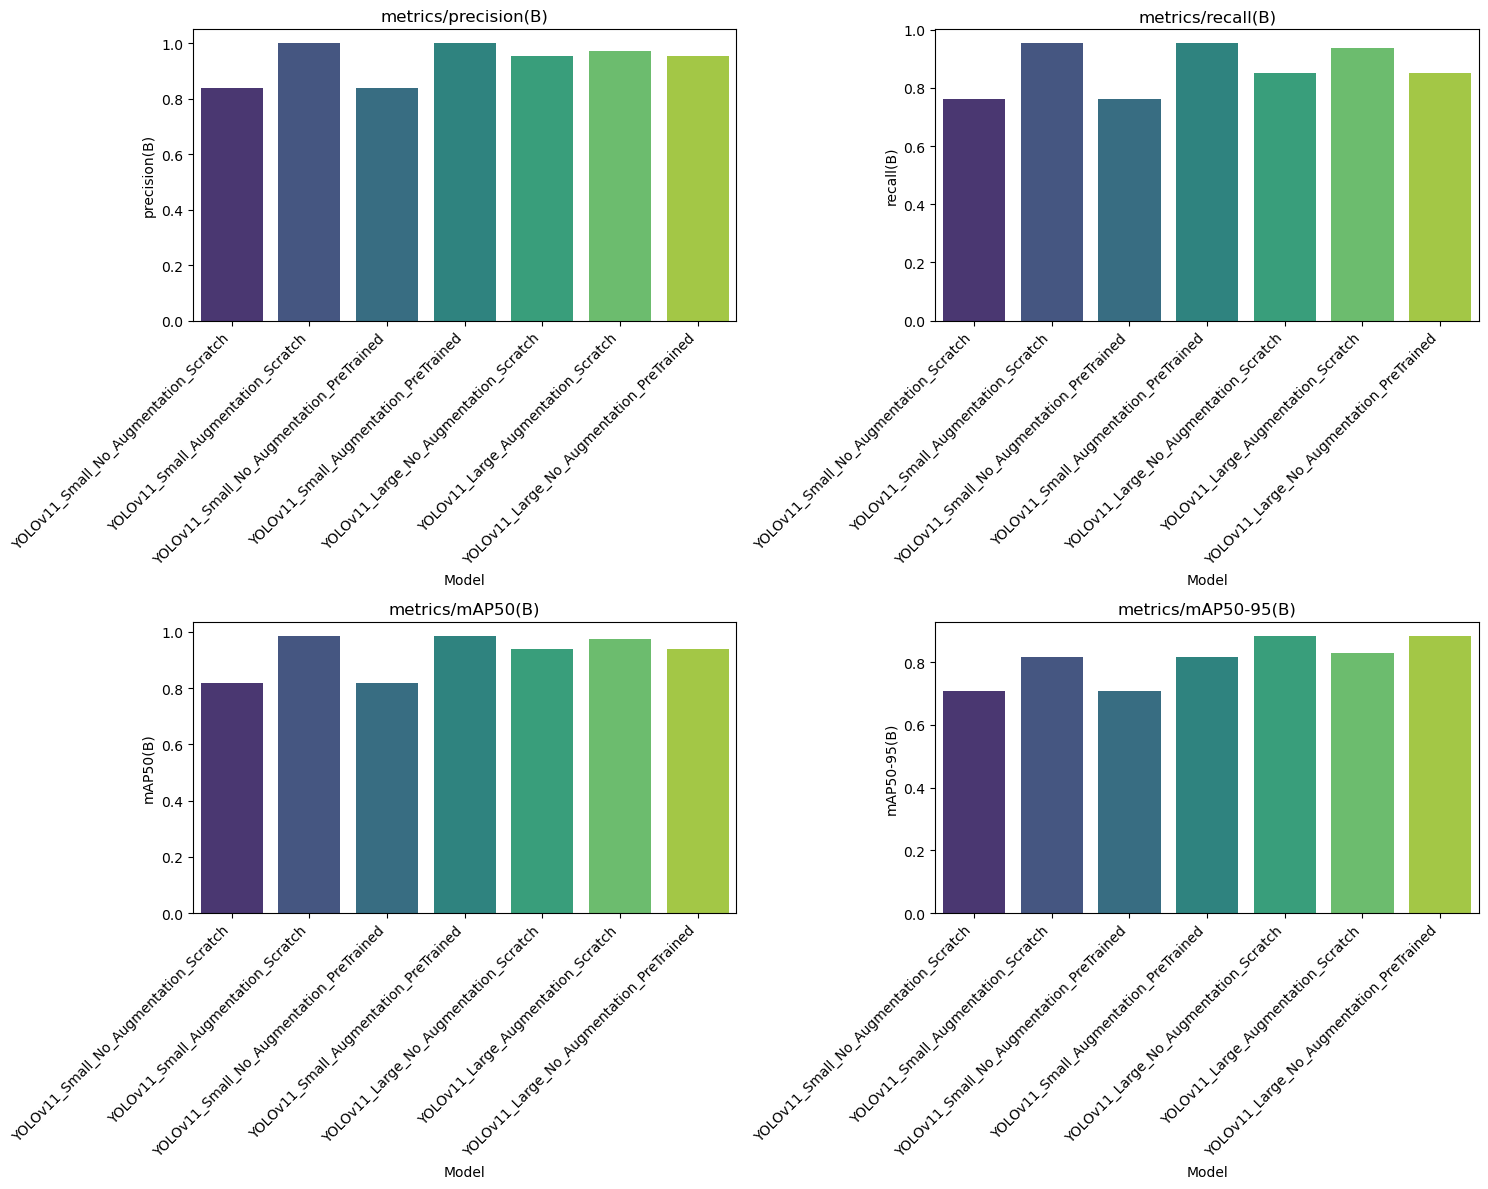

In [23]:
performance_metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

for ax, metric in zip(axs.flatten(), performance_metrics):
    sns.barplot(
        x='Model',
        y=metric,
        data=results_df,
        ax=ax,
        palette='viridis'
    )
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric.split('/')[1])
    ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

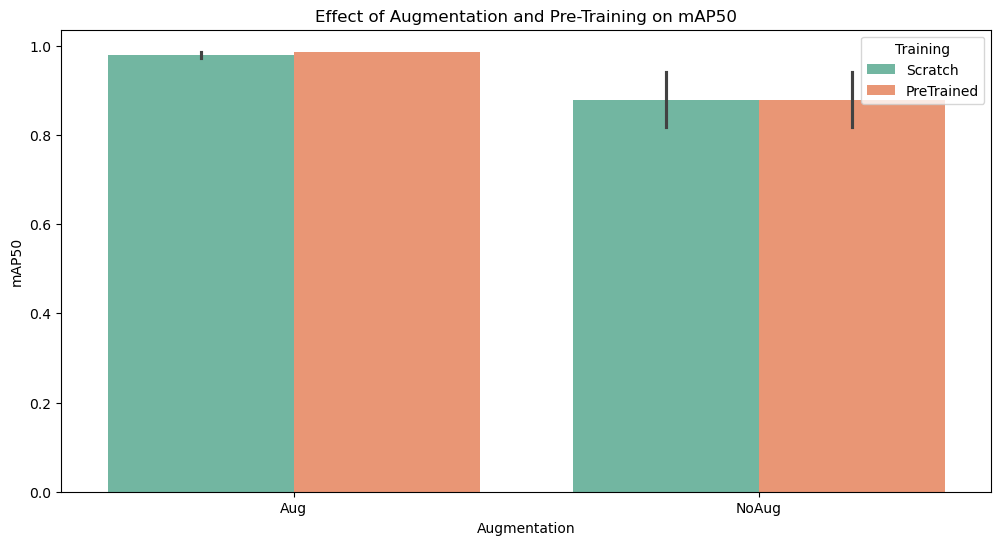

In [29]:
avg_performance = results_df.groupby(['Size', 'Augmentation', 'Training'])[performance_metrics].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Augmentation',
    y='metrics/mAP50(B)',
    hue='Training',
    data=avg_performance,
    palette='Set2'
)
plt.title('Effect of Augmentation and Pre-Training on mAP50')
plt.ylabel('mAP50')
plt.show()

**Performance Metrics**

- Small Models vs. Large Models: Large models generally have higher mAP50 and mAP50-95 scores compared to small models, indicating better overall performance
- Augmentation Impact: Models trained with augmentation (Aug) tend to have higher precision and mAP50 scores, especially in small models
- Pre-Training Impact: Pre-trained models show improved recall and mAP scores compared to models trained from scratch

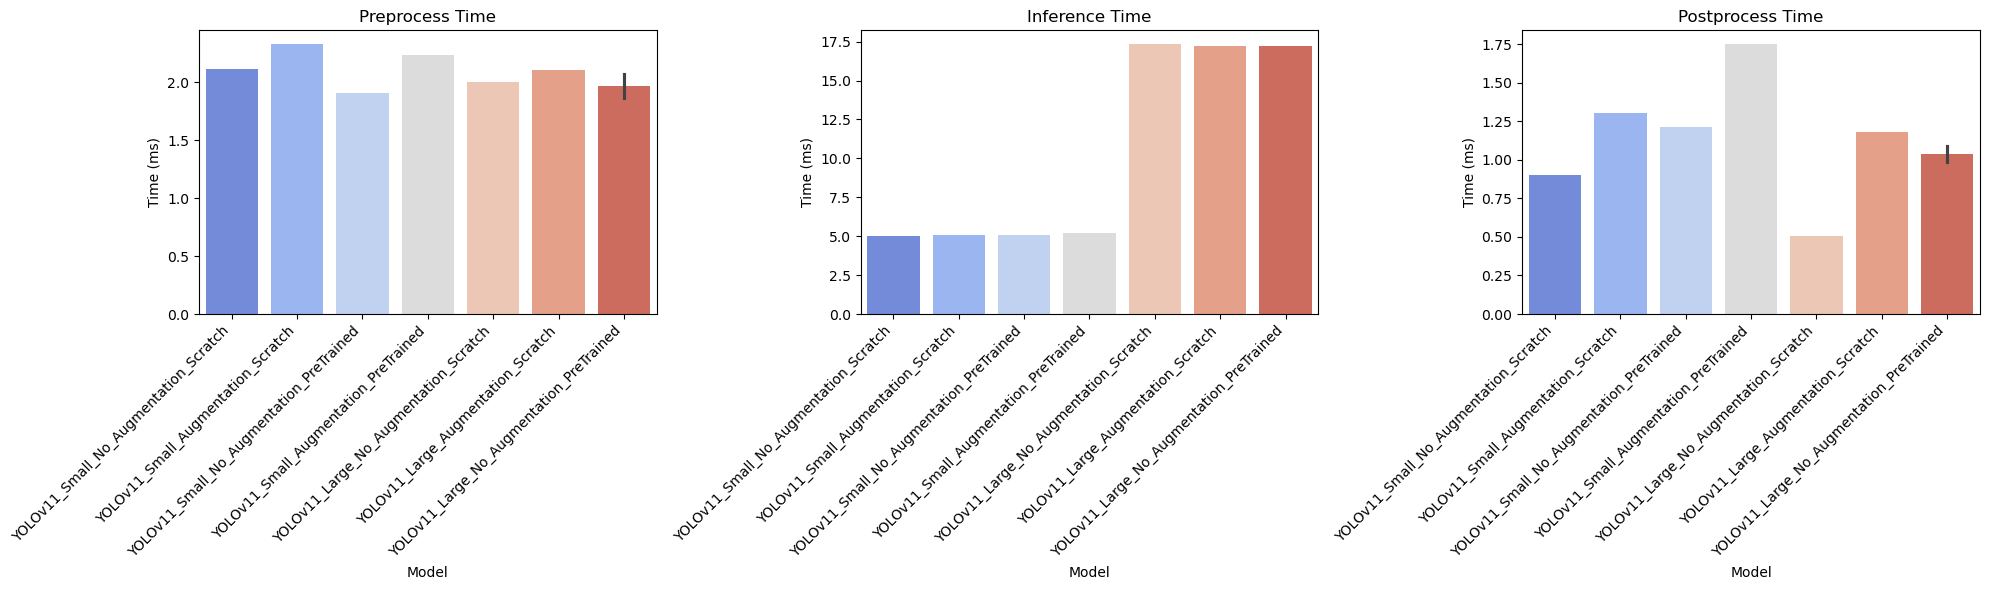

In [24]:
speed_metrics = ['preprocess', 'inference', 'postprocess']

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for ax, metric in zip(axs, speed_metrics):
    sns.barplot(
        x='Model',
        y=metric,
        data=results_df,
        ax=ax,
        palette='coolwarm'
    )
    ax.set_title(f'{metric.capitalize()} Time')
    ax.set_xlabel('Model')
    ax.set_ylabel('Time (ms)')
    ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Speed Metrics**

- Inference Time: Small models have significantly lower inference times (~5 ms) compared to large models (~17 ms), making them more suitable for real-time detection
- Preprocessing and Postprocessing Times: These times are relatively consistent across models, with minor variations

# Model Choice

**YOLOv11_Small_Augmentation_PreTrained** model offers excellent performance metrics with high precision, recall, and mAP scores while maintaining low inference time

# Visualize Test Images

In [31]:
test_images_folder = os.path.join(os.path.dirname(os.getcwd()), 'data', 'yalo', 'test', 'images')

model_name = 'YOLOv11_Small_Augmentation_PreTrained'
model_path = os.path.join(models_folder, model_name, 'weights', 'best.pt')
model = YOLO(model_path)

In [43]:
def plot_random_detections(model, test_folder, num_images=15):
    # Load all image from the test folder
    image_files = [f for f in os.listdir(test_folder)]
    
    selected_images = random.sample(image_files, num_images)
    
    fig, axes = plt.subplots(3, 5, figsize=(15, 10))  
    axes = axes.flatten()  
    
    for i, image_name in enumerate(selected_images):
        image_path = os.path.join(test_folder, image_name)
        image = Image.open(image_path)
        
        results = model.predict(image, conf=0.7)
        
        # Check if any objects were detected
        if results[0].boxes:
            title = f"{image_name}: Detected"
            im_boxes = results[0].plot(labels=False, probs=True)
        else:
            title = f"{image_name}: Not Detected"
            im_boxes = image
        
        # Display the image
        axes[i].imshow(im_boxes)
        axes[i].set_title(title)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()


0: 416x640 1 metallic_probe, 10.0ms
Speed: 1.4ms preprocess, 10.0ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 metallic_probe, 8.5ms
Speed: 1.1ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 metallic_probe, 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 metallic_probe, 8.4ms
Speed: 1.0ms preprocess, 8.4ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 metallic_probe, 8.9ms
Speed: 1.0ms preprocess, 8.9ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 metallic_probe, 8.1ms
Speed: 1.0ms preprocess, 8.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 metallic_probe, 8.4ms
Speed: 1.0ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 metallic_probe, 14.9ms
Speed: 1.4ms preprocess, 14.9ms infer

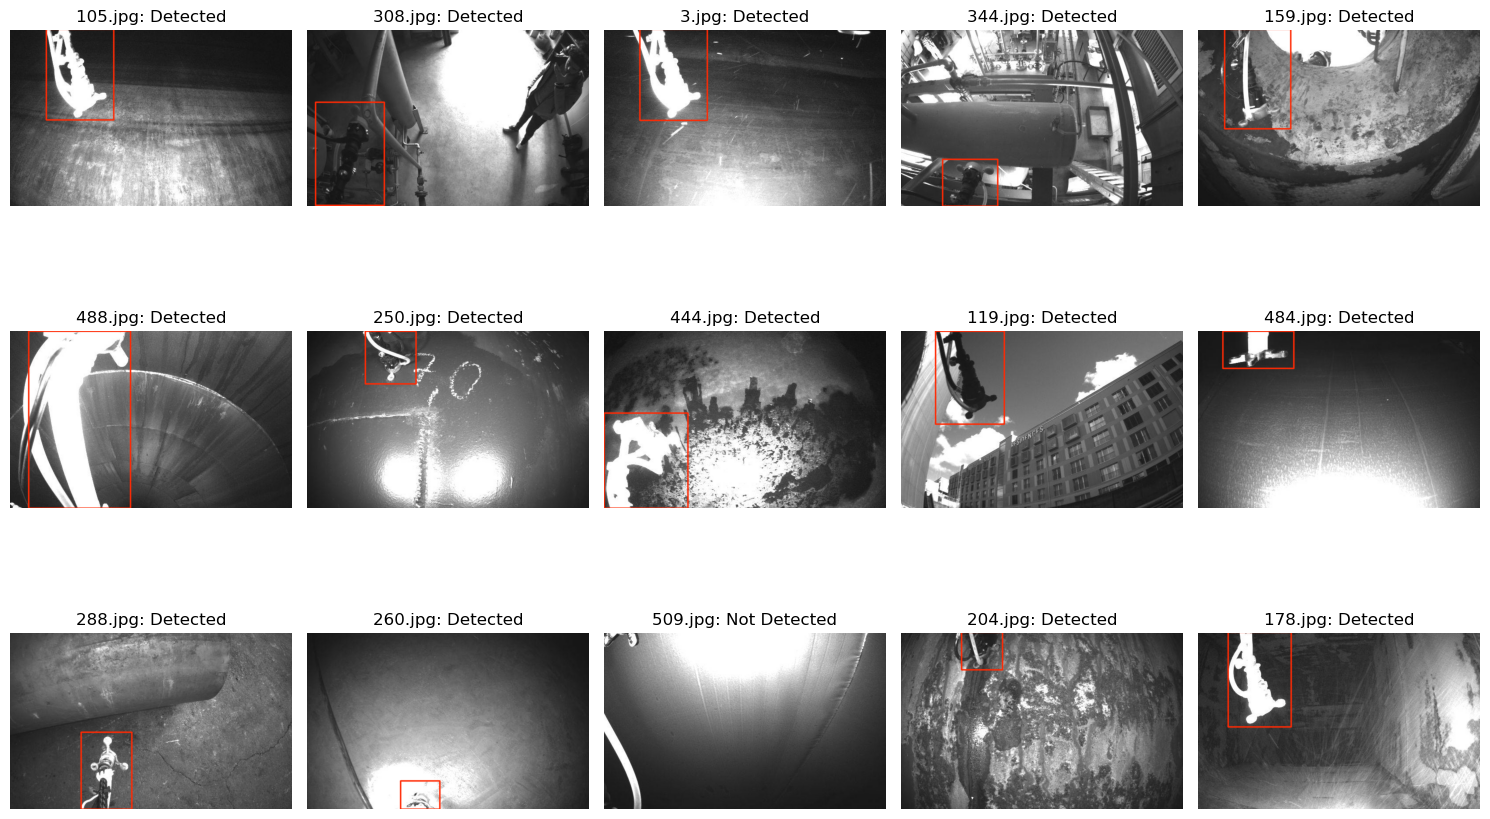

In [44]:
plot_random_detections(model, test_images_folder)